# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
sinasc_RO_2019=pd.read_csv('b1abb33c4f.csv')

sinasc_RO_2019.shape

(27028, 69)

In [92]:
sinasc_RO_2019.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [93]:
sinasc_RO_2019.loc[sinasc_RO_2019['APGAR5']>=8.0, 'APGAR5_CAT']='normal'
sinasc_RO_2019.loc[(sinasc_RO_2019['APGAR5']<=7.0)& (sinasc_RO_2019['APGAR5']>=6.0), 'APGAR5_CAT']='asfixia leve'
sinasc_RO_2019.loc[(sinasc_RO_2019['APGAR5']<=5.0)& (sinasc_RO_2019['APGAR5']>=4.0), 'APGAR5_CAT']='asfixia moderada'
sinasc_RO_2019.loc[sinasc_RO_2019['APGAR5']<=3.0, 'APGAR5_CAT']='asfixia grave'

In [94]:
sinasc_RO_2019['APGAR5_CAT'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: APGAR5_CAT, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [95]:
sinasc_RO_2019['GESTACAO'].value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

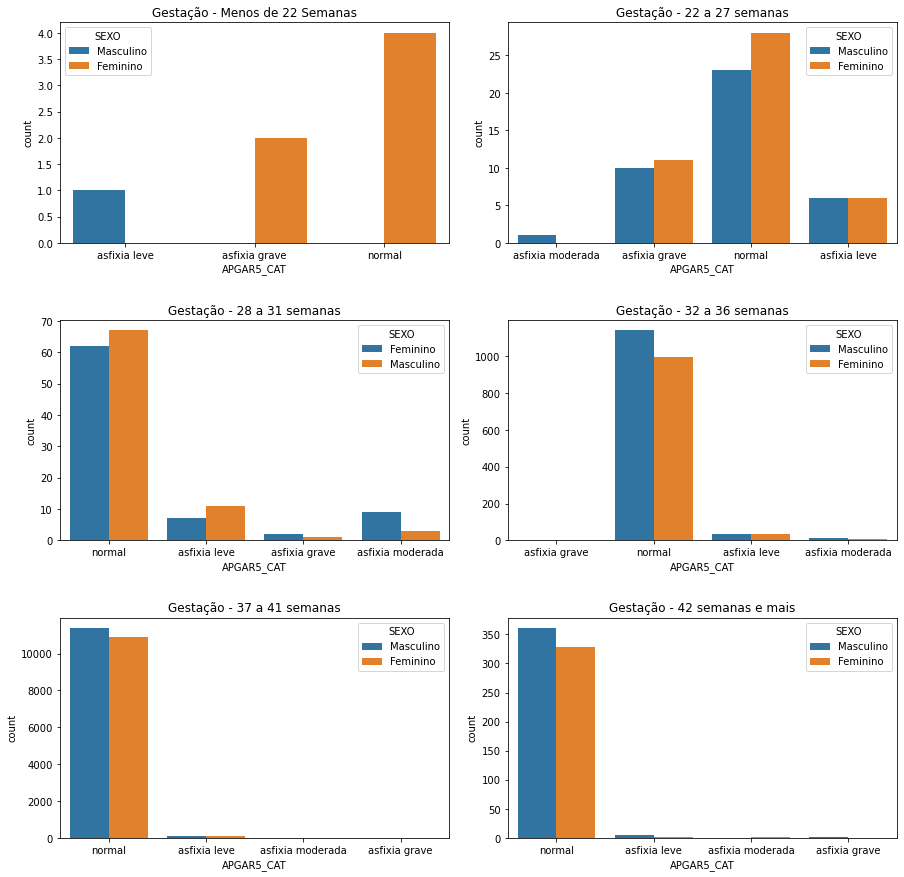

In [96]:
plt.rc('figure', figsize=(15, 15))
fig, axes = plt.subplots(3, 2)

sns.countplot( ax = axes[0, 0]
             , x = 'APGAR5_CAT'
             , hue = 'SEXO'
             , data = sinasc_RO_2019.loc[sinasc_RO_2019['GESTACAO']=='Menos de 22 semanas']
             )
sns.countplot( ax = axes[0, 1]
             , x = 'APGAR5_CAT'
             , hue = 'SEXO'
             , data = sinasc_RO_2019.loc[sinasc_RO_2019['GESTACAO']=='22 a 27 semanas']
             )
sns.countplot( ax = axes[1, 0]
             , x = 'APGAR5_CAT'
             , hue = 'SEXO'
             , data = sinasc_RO_2019.loc[sinasc_RO_2019['GESTACAO']=='28 a 31 semanas']
             )
sns.countplot( ax = axes[1, 1]
             , x = 'APGAR5_CAT'
             , hue = 'SEXO'
             , data = sinasc_RO_2019.loc[sinasc_RO_2019['GESTACAO']=='32 a 36 semanas']
             )
sns.countplot( ax = axes[2, 0]
             , x = 'APGAR5_CAT'
             , hue = 'SEXO'
             , data = sinasc_RO_2019.loc[sinasc_RO_2019['GESTACAO']=='37 a 41 semanas']
             )
sns.countplot( ax = axes[2, 1]
             , x = 'APGAR5_CAT'
             , hue = 'SEXO'
             , data = sinasc_RO_2019.loc[sinasc_RO_2019['GESTACAO']=='42 semanas e mais']
             )

axes[0,0].set_title('Gestação - Menos de 22 Semanas')
axes[0,1].set_title('Gestação - 22 a 27 semanas')
axes[1,0].set_title('Gestação - 28 a 31 semanas')
axes[1,1].set_title('Gestação - 32 a 36 semanas')
axes[2,0].set_title('Gestação - 37 a 41 semanas')
axes[2,1].set_title('Gestação - 42 semanas e mais')
plt.subplots_adjust(wspace=0.15, hspace=0.35)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [99]:
freq=pd.crosstab(sinasc_RO_2019['GESTACAO'], sinasc_RO_2019['APGAR5_CAT'])
freq

APGAR5_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [100]:
freq.sum(axis=1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [102]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis =0)
freq_pctlin

APGAR5_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


In [103]:
freq_pctlin.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

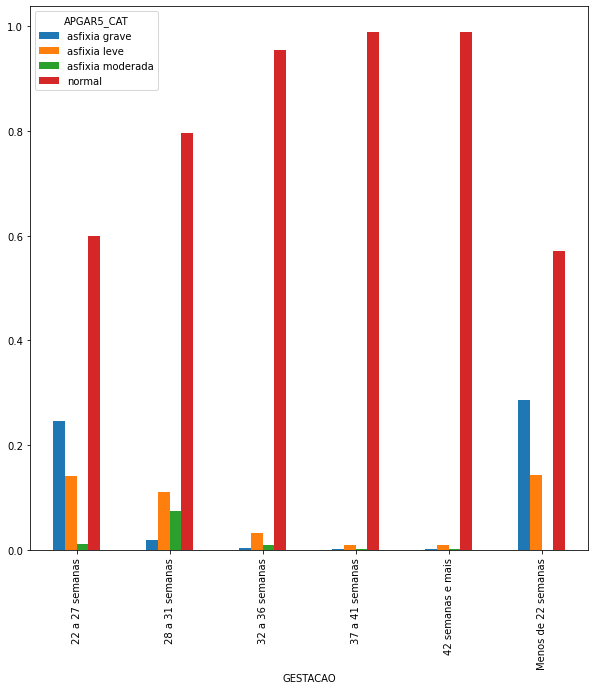

In [125]:
freq_pctlin.plot.bar()


Conclusão: Note-se que quanto menor for o tempo de gestação maior é a porcentagem de asfixia no bebê. Enfim, nas gestações menos de 22 semanas, entre 22 a 27 semanas e entre 28 a 31 semana, verifica-se uma percentagem de asfixia grave e leve mais considerável. Enquanto que a partir da gestação de 37 semanas, as percentagens de asfixia cai consideravelmente, ao ponto dos partos normais ficarem próximo a 99%. Portanto, estes dados corroboram para a afirmação médica acerca da classificação do parto prematura quando a gestação tem menos de 27 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

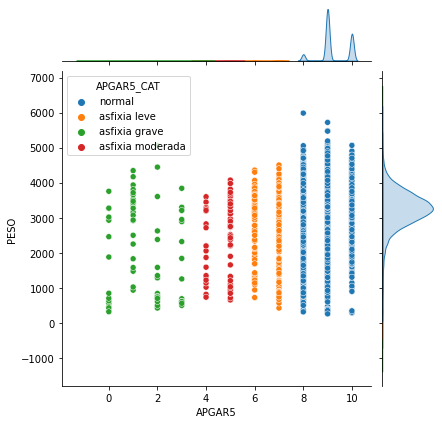

In [126]:
sns.jointplot(data=sinasc_RO_2019, x='APGAR5', y='PESO', hue = 'APGAR5_CAT')

CONCLUSÂO: Pelo gráfico acima, os dados demonstram não haver uma relação entre o APGAR5 e o peso do bebê, visto que em qualquer categoria do APGAR5 há bebês com pesos variados. Praticamente a variação de peso se mantém em qualquer categoria do APGAR5.  